In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/game case/newgamedata1.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_32248\2802731786.py:1: DtypeWarning: Columns (0,3,5,8,9,10,11,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/game case/newgamedata1.csv")


In [3]:
df.head()

,id,slug,name,metacritic,released,tba,updated,website,rating,achievements_count,...,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164
0,1,dgeneration-hd,D/Generation HD,NaN,23-10-2015,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,g-prime,G Prime Into The Rain,NaN,06-01-2016,False,2019-11-06T23:04:19,NaN,0.0,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,land-sliders,Land Sliders,NaN,24-09-2015,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000,pixel-gear,Pixel Gear,NaN,20-10-2016,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000,gods-and-idols,Gods and Idols,NaN,12-12-2016,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100565 entries, 0 to 100564
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100354 non-null  object
 1   slug                100275 non-null  object
 2   name                100260 non-null  object
 3   metacritic          1528 non-null    object
 4   released            99951 non-null   object
 5   tba                 100235 non-null  object
 6   updated             100230 non-null  object
 7   website             7958 non-null    object
 8   rating              100227 non-null  object
 9   achievements_count  100224 non-null  object
 10  ratings_count       100224 non-null  object
 11  suggestions_count   100224 non-null  object
 12  platforms           97847 non-null   object
 13  developers          100077 non-null  object
 14  genres              76890 non-null   object
 15  publishers          10197 non-null   object
 16  es

In [6]:
df.describe()

,id,slug,name,metacritic,released,tba,updated,website,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating,image,about
count,100354,100275,100260,1528.0,99951,100235,100230,7958,100227.0,100224,100224,100224,97847,100077,76890,10197,1766,90671,88754
unique,100196,100159,100145,139.0,3079,18,5797,6972,460.0,385,496,1249,937,57502,845,6301,8,90620,88440
top,},#NAME?,sua armadura faz um barulho,75.0,13-08-2018,False,2019-01-09T12:41:06,https://www.choiceofgames.com/,0.0,0,0,0,PC,Plug In Digital,Action,Big Fish Games,Everyone 10+,https://media.rawg.io/media/screenshots/80c/80...,#NAME?
freq,29,3,3,68.0,839,92371,82540,52,89451.0,87906,85507,2901,47201,114,13521,114,631,2,35


In [7]:
df.drop(columns = ['slug', 'website', 'image', 'about'], inplace=True)

In [8]:
# dropping null id

df.dropna(subset='id', inplace=True)

In [9]:
# dropping duplicated 'id'

df = df.drop_duplicates(subset='id', keep='first')

In [10]:
# checking the type of 'id'

df['id'].apply(type).value_counts()

id
<class 'int'>    92265
<class 'str'>     7931
Name: count, dtype: int64

In [11]:
# convert 'id' column to numeric

df['id'] = pd.to_numeric(df['id'], errors = 'coerce')

In [12]:
# dropping null 'id'

df.dropna(subset='id', inplace=True)

In [13]:
# convert id to int

df['id'] = df['id'].astype(int)

In [14]:
#check the dtype of 'metacritic'

df['metacritic'].apply(type).value_counts()

metacritic
<class 'float'>    99990
<class 'str'>        123
Name: count, dtype: int64

In [15]:
# convert the 'metacritic' column to numeric only

df['metacritic'] = pd.to_numeric(df['metacritic'], errors='coerce')

In [16]:
df['metacritic'].apply(type).value_counts()

metacritic
<class 'float'>    100113
Name: count, dtype: int64

In [17]:
# check the dtype of 'released'

df['released'].apply(type).value_counts()

released
<class 'str'>      99819
<class 'float'>      294
Name: count, dtype: int64

In [18]:
df[df['released'].apply(lambda x: isinstance(x, str))].head()

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating
0,1,D/Generation HD,NaN,23-10-2015,False,2019-09-17T11:58:57,0.0,80,2,292,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+
1,10,G Prime Into The Rain,NaN,06-01-2016,False,2019-11-06T23:04:19,0.0,26,3,389,macOS||PC||Xbox One,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone
2,100,Land Sliders,NaN,24-09-2015,False,2019-10-22T13:56:16,0.0,0,2,83,iOS,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+
3,1000,Pixel Gear,NaN,20-10-2016,False,2019-08-28T22:16:02,0.0,0,0,455,PC||PlayStation 4,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen
4,10000,Gods and Idols,NaN,12-12-2016,False,2019-09-17T13:37:13,0.0,0,5,262,PC,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN


In [19]:
# convert column 'released' to date only

df['released'] = pd.to_datetime(df['released'], format = '%d-%m-%Y' , errors = 'coerce')

In [20]:
# check the dtype of 'tba'

df['tba'].apply(type).value_counts()

tba
<class 'bool'>    92265
<class 'str'>      7848
Name: count, dtype: int64

In [21]:
df['tba'].value_counts()

tba
False    92263
FALSE     7847
True         2
TRUE         1
Name: count, dtype: int64

In [22]:
# convert 'tba' to lower so the format is consistent

df['tba'] = df['tba'].astype(str).str.lower()

In [23]:
#check the dtype of 'updated'

df['updated'].apply(type).value_counts()

updated
<class 'str'>    100113
Name: count, dtype: int64

In [24]:
# convert column 'updated' to datetime

df['updated'] = pd.to_datetime(df['updated'], errors = 'coerce')

In [25]:
# convert 'rating' column to numeric

df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

In [26]:
df['achievements_count'].apply(type).value_counts()

achievements_count
<class 'int'>    92265
<class 'str'>     7848
Name: count, dtype: int64

In [27]:
#check the actual value

df[df['achievements_count'].apply(lambda x: isinstance(x,str))]

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating
69632,165441,FPS Shooter Template (Construct 2) .capx,NaN,2017-02-05,false,2019-01-09 12:41:06,0.0,0,0,6,PC,Mau4X,Shooter,NaN,NaN
69633,165442,The Text That Never Ends - SMS Prank App,NaN,2017-03-10,false,2019-01-09 12:41:06,0.0,0,0,6,Android,Kevin Loring,NaN,NaN,NaN
69634,165443,Dark Assault,NaN,2017-12-21,false,2019-01-09 12:41:06,0.0,0,0,230,PC||Android,Gaming Revolution,RPG,NaN,NaN
69635,165444,Spell Shooter,NaN,2017-07-14,false,2019-01-09 12:41:06,0.0,0,0,11,Web,Matthew Palermo,Shooter,NaN,NaN
69636,165445,Unblock lifeguard — Slide Puzzle,NaN,2018-05-26,false,2019-01-09 12:41:06,0.0,0,0,0,PC,julicr,Puzzle,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94203,188176,Pill Pusher,NaN,2017-04-12,false,2019-01-09 12:41:06,0.0,0,0,23,PC||macOS||Linux||Android,Mayans94,NaN,NaN,NaN
94204,188177,TDS-v0.01,NaN,2017-12-12,false,2019-01-09 12:41:06,0.0,0,0,20,PC||macOS,igorvlc201700,Action||RPG,NaN,NaN
94205,188178,Egger Tycoon,NaN,2018-06-19,false,2019-01-09 12:41:06,0.0,0,0,6,PC,Whitefro,Action||Strategy,NaN,NaN
94206,188179,Cloud Jumper,NaN,2017-11-19,false,2019-01-09 12:41:06,0.0,0,0,49,PC,Berg Sergej,NaN,NaN,NaN


In [28]:
# convert 'achievements_count' column to int

df['achievements_count'] = df['achievements_count'].astype(int)

In [29]:
#check the dtype

df['ratings_count'].apply(type).value_counts()

ratings_count
<class 'int'>    92265
<class 'str'>     7848
Name: count, dtype: int64

In [30]:
#check the actual value

df[df['ratings_count'].apply(lambda x: isinstance(x,str))]

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating
69632,165441,FPS Shooter Template (Construct 2) .capx,NaN,2017-02-05,false,2019-01-09 12:41:06,0.0,0,0,6,PC,Mau4X,Shooter,NaN,NaN
69633,165442,The Text That Never Ends - SMS Prank App,NaN,2017-03-10,false,2019-01-09 12:41:06,0.0,0,0,6,Android,Kevin Loring,NaN,NaN,NaN
69634,165443,Dark Assault,NaN,2017-12-21,false,2019-01-09 12:41:06,0.0,0,0,230,PC||Android,Gaming Revolution,RPG,NaN,NaN
69635,165444,Spell Shooter,NaN,2017-07-14,false,2019-01-09 12:41:06,0.0,0,0,11,Web,Matthew Palermo,Shooter,NaN,NaN
69636,165445,Unblock lifeguard — Slide Puzzle,NaN,2018-05-26,false,2019-01-09 12:41:06,0.0,0,0,0,PC,julicr,Puzzle,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94203,188176,Pill Pusher,NaN,2017-04-12,false,2019-01-09 12:41:06,0.0,0,0,23,PC||macOS||Linux||Android,Mayans94,NaN,NaN,NaN
94204,188177,TDS-v0.01,NaN,2017-12-12,false,2019-01-09 12:41:06,0.0,0,0,20,PC||macOS,igorvlc201700,Action||RPG,NaN,NaN
94205,188178,Egger Tycoon,NaN,2018-06-19,false,2019-01-09 12:41:06,0.0,0,0,6,PC,Whitefro,Action||Strategy,NaN,NaN
94206,188179,Cloud Jumper,NaN,2017-11-19,false,2019-01-09 12:41:06,0.0,0,0,49,PC,Berg Sergej,NaN,NaN,NaN


In [31]:
# convert 'ratings_count' column to int

df['ratings_count'] = df['ratings_count'].astype(int)

In [32]:
# check the dtype

df['suggestions_count'].apply(type).value_counts()

suggestions_count
<class 'int'>    92265
<class 'str'>     7848
Name: count, dtype: int64

In [33]:
# check the actual value

df[df['suggestions_count'].apply(lambda x: isinstance(x,str))]

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating
69632,165441,FPS Shooter Template (Construct 2) .capx,NaN,2017-02-05,false,2019-01-09 12:41:06,0.0,0,0,6,PC,Mau4X,Shooter,NaN,NaN
69633,165442,The Text That Never Ends - SMS Prank App,NaN,2017-03-10,false,2019-01-09 12:41:06,0.0,0,0,6,Android,Kevin Loring,NaN,NaN,NaN
69634,165443,Dark Assault,NaN,2017-12-21,false,2019-01-09 12:41:06,0.0,0,0,230,PC||Android,Gaming Revolution,RPG,NaN,NaN
69635,165444,Spell Shooter,NaN,2017-07-14,false,2019-01-09 12:41:06,0.0,0,0,11,Web,Matthew Palermo,Shooter,NaN,NaN
69636,165445,Unblock lifeguard — Slide Puzzle,NaN,2018-05-26,false,2019-01-09 12:41:06,0.0,0,0,0,PC,julicr,Puzzle,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94203,188176,Pill Pusher,NaN,2017-04-12,false,2019-01-09 12:41:06,0.0,0,0,23,PC||macOS||Linux||Android,Mayans94,NaN,NaN,NaN
94204,188177,TDS-v0.01,NaN,2017-12-12,false,2019-01-09 12:41:06,0.0,0,0,20,PC||macOS,igorvlc201700,Action||RPG,NaN,NaN
94205,188178,Egger Tycoon,NaN,2018-06-19,false,2019-01-09 12:41:06,0.0,0,0,6,PC,Whitefro,Action||Strategy,NaN,NaN
94206,188179,Cloud Jumper,NaN,2017-11-19,false,2019-01-09 12:41:06,0.0,0,0,49,PC,Berg Sergej,NaN,NaN,NaN


In [34]:
# convert column 'suggestions_count' to int

df['suggestions_count'] = df['suggestions_count'].astype(int)

In [35]:
df['esrb_rating'].value_counts()

esrb_rating
Everyone 10+      631
Teen              562
Mature            299
Everyone          174
Adults Only        93
Rating Pending      5
Name: count, dtype: int64

In [36]:
df = df[(df['released'].dt.to_period('M').dt.start_time>'2013-01-01')&(df['released'].dt.to_period('M').dt.start_time<'2019-01-01')]

In [37]:
# convert 'platforms' column to string to split properly

df['platforms'] = df['platforms'].astype(str)

In [38]:
# turn 'platforms' into list

df['platforms'] = df['platforms'].apply(lambda x: x.split('||'))

In [39]:
# explode 'platforms' and into a bridge table

platforms_bridge = df[['id', 'platforms']].explode('platforms')

In [40]:
# replace 'nan' to actual null , drop null 'platforms' in bridge table

platforms_bridge['platforms'] = platforms_bridge['platforms'].replace('nan',pd.NA)
platforms_bridge.dropna(subset = 'platforms', inplace=True)

In [41]:
# create platforms dim table

platforms_dim = platforms_bridge['platforms'].drop_duplicates().reset_index(drop=True).to_frame()
platforms_dim['PlatformID'] = platforms_dim.index + 1

In [42]:
# convert 'developers' column to str

df['developers'] = df['developers'].astype(str)

In [43]:
# turn 'developers' into list

df['developers'] = df['developers'].apply(lambda x: x.split('||'))

In [44]:
# explode 'developers' and into bridge tale

developers_bridge = df[['id', 'developers']].explode('developers')

In [45]:
# drop null 'developers' in bridge table

developers_bridge.dropna(subset = 'developers', inplace=True)

In [46]:
# replace 'nan' to actual null 

developers_bridge['developers'] = developers_bridge['developers'].replace('nan',pd.NA)

In [47]:
# create developers dim table

developers_dim = developers_bridge['developers'].drop_duplicates().reset_index(drop=True).to_frame()
developers_dim['developerID'] = developers_dim.index+1

In [48]:
# convert 'genres' to str

df['genres'] = df['genres'].astype(str)

In [49]:
# turn 'genres' column into list

df['genres'] = df['genres'].apply(lambda x: x.split('||'))

In [50]:
# explode 'genres' column and into bridge table

genres_bridge = df[['id', 'genres']].explode('genres')

In [51]:
# replace 'nan' to actual null , drop null 'genres' in bridge table

genres_bridge['genres'] = genres_bridge['genres'].replace('nan',pd.NA)
genres_bridge.dropna(subset = 'genres', inplace=True)

In [52]:
# create genres dim table

genres_dim = genres_bridge['genres'].drop_duplicates().reset_index(drop=True).to_frame()
genres_dim['genreID'] = genres_dim.index+1

In [53]:
# create publishers_bridge and publishers_dim tables
df['publishers']=df['publishers'].astype(str)
df['publishers']=df['publishers'].apply(lambda x: x.split('||'))

In [54]:
publishers_bridge = df[['id', 'publishers']].explode('publishers')

In [55]:
publishers_bridge['publishers'] = publishers_bridge['publishers'].replace('nan',pd.NA)

In [56]:
publishers_bridge.dropna(subset='publishers', inplace=True)

In [57]:
publishers_dim = publishers_bridge['publishers'].drop_duplicates().reset_index(drop=True).to_frame()
publishers_dim['publisherID'] = publishers_dim.index+1

In [58]:
df.head()

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating
0,1,D/Generation HD,NaN,2015-10-23,false,2019-09-17 11:58:57,0.0,80,2,292,"[PC, macOS, Xbox One, PlayStation 4, Nintendo ...",[West Coast Software],"[Adventure, Puzzle]",[West Coast Software],Everyone 10+
1,10,G Prime Into The Rain,NaN,2016-01-06,false,2019-11-06 23:04:19,0.0,26,3,389,"[macOS, PC, Xbox One]",[Soma Games],"[Simulation, Indie]","[Immanitas Entertainment, Code-Monkeys]",Everyone
2,100,Land Sliders,NaN,2015-09-24,false,2019-10-22 13:56:16,0.0,0,2,83,[iOS],[Prettygreat Pty],"[Adventure, Arcade]",[Prettygreat Pty],Everyone 10+
3,1000,Pixel Gear,NaN,2016-10-20,false,2019-08-28 22:16:02,0.0,0,0,455,"[PC, PlayStation 4]","[Oasis Games, Geronimo Interactive]","[Action, Indie]",[Geronimo Interactive],Teen
4,10000,Gods and Idols,NaN,2016-12-12,false,2019-09-17 13:37:13,0.0,0,5,262,[PC],[Viking Tao],"[RPG, Strategy, Massively Multiplayer]",[Viking Tao],NaN


In [59]:
platforms_bridge.groupby('platforms').size().sort_values(ascending=False).head(10)

platforms
PC                 72639
Web                25454
macOS              20485
Linux              14419
Android             5008
iOS                  907
PlayStation 4        690
Xbox One             577
Nintendo Switch      493
PS Vita              107
dtype: int64

In [60]:
df.describe()

,id,metacritic,released,updated,rating,achievements_count,ratings_count,suggestions_count
count,98333.000000,858.000000,98333,98333,98333.000000,98333.000000,98333.000000,98333.000000
mean,135622.594704,70.407925,2017-01-17 10:08:06.697242880,2019-02-18 06:20:58.106037248,0.065256,2.522693,1.435500,74.977332
min,1.000000,20.000000,2013-02-01 00:00:00,2019-01-09 12:41:06,0.000000,0.000000,0.000000,0.000000
25%,117041.000000,65.000000,2016-04-17 00:00:00,2019-01-09 12:41:06,0.000000,0.000000,0.000000,16.000000
50%,142609.000000,72.000000,2017-04-04 00:00:00,2019-01-09 12:41:06,0.000000,0.000000,0.000000,39.000000
75%,168485.000000,78.000000,2018-01-18 00:00:00,2019-01-09 12:41:06,0.000000,0.000000,0.000000,90.000000
max,194179.000000,95.000000,2018-12-22 00:00:00,2020-12-21 02:57:48,4.750000,9821.000000,1694.000000,1233.000000
std,45592.913942,11.060944,NaN,NaN,0.447124,63.758706,25.278965,98.663384


In [61]:
developers_bridge.groupby('developers').size().sort_values(ascending=False).head(10)

developers
Plug In Digital                            140
POLIMI Game Collective                      74
Rosden Shadow                               65
Levi D. Smith                               59
Sean                                        54
John Retroreloader @ Return learn games     50
Terracottafrog                              47
Sebastian Scaini                            44
DOS                                         43
James Earl Cox III                          42
dtype: int64

In [62]:
genres_bridge.groupby('genres').size().sort_values(ascending=False).head(10)

genres
Action        20633
Platformer    12617
Adventure     11746
Puzzle        10298
Shooter        9128
Simulation     6956
Indie          5960
Strategy       5651
RPG            5420
Casual         2874
dtype: int64

<Axes: >

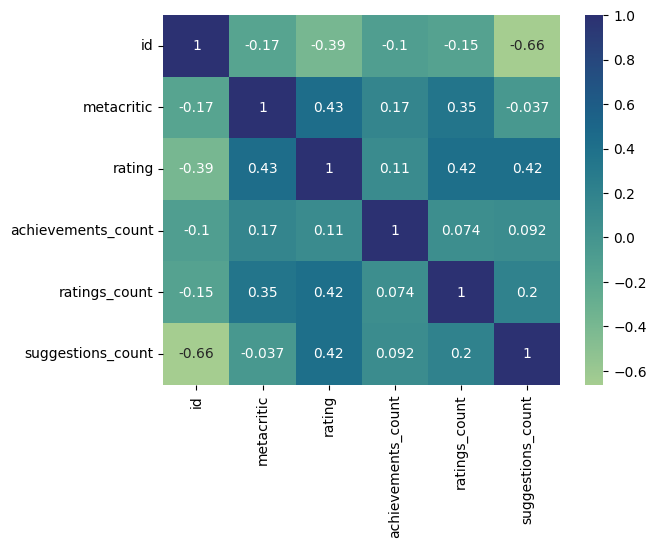

In [63]:
#  check the corr of numeric columns

sns.heatmap(data = df.corr(numeric_only=True), annot=True, cmap='crest')

Text(0, 0.5, 'Count')

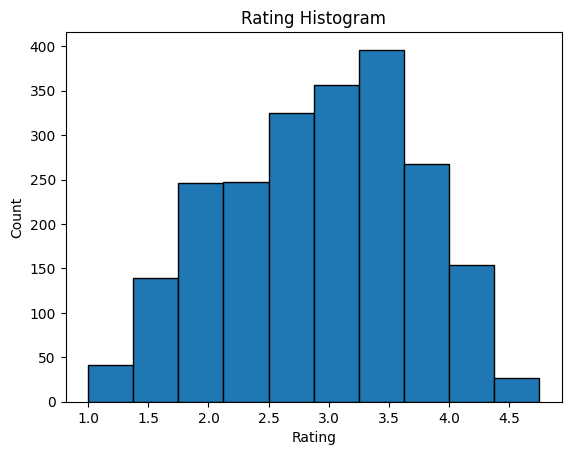

In [64]:
ax=plt.gca()
df[df['rating'] != 0]['rating'].plot(kind='hist', edgecolor='black')
plt.title('Rating Histogram')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

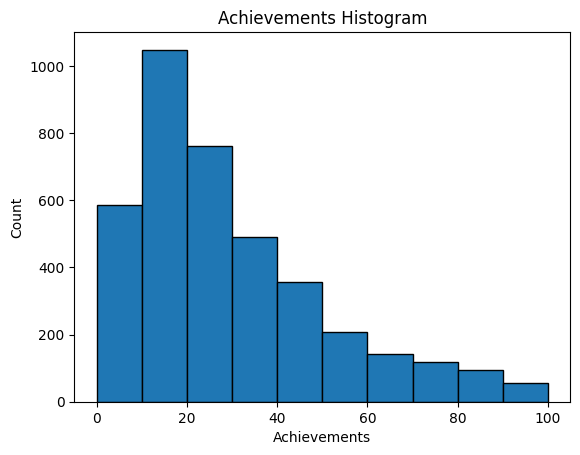

In [65]:
ax=plt.gca()
df[df['achievements_count'] != 0]['achievements_count'].plot(kind='hist', edgecolor='black', range=(0,100))
plt.title('Achievements Histogram')
plt.xlabel('Achievements')
plt.ylabel('Count')

In [66]:
df['achievements_count'].describe()

count    98333.000000
mean         2.522693
std         63.758706
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9821.000000
Name: achievements_count, dtype: float64

<Axes: >

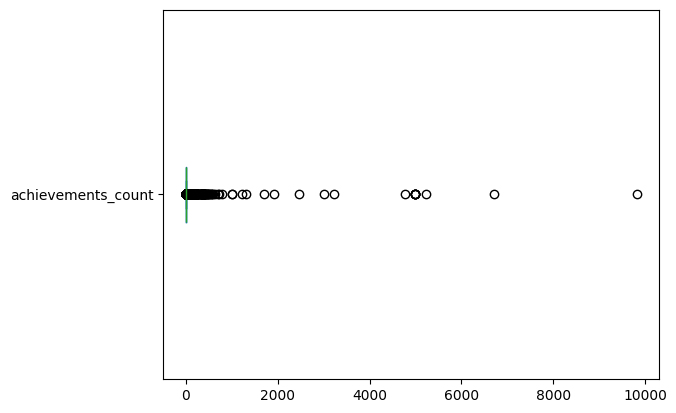

In [67]:
df['achievements_count'].plot(kind='box', vert=False)

Text(0, 0.5, 'Count')

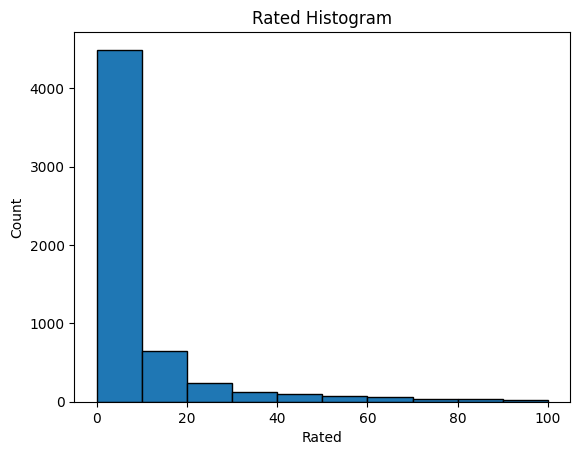

In [68]:
ax=plt.gca()
df[df['ratings_count'] != 0]['ratings_count'].plot(kind='hist', edgecolor='black', range=(0,100))
plt.title('Rated Histogram')
plt.xlabel('Rated')
plt.ylabel('Count')

<Axes: >

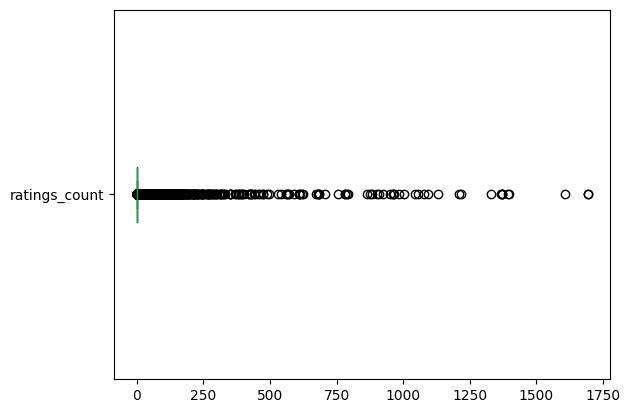

In [69]:
df['ratings_count'].plot(kind='box', vert=False)

In [70]:
df['ratings_count'].describe()

count    98333.000000
mean         1.435500
std         25.278965
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1694.000000
Name: ratings_count, dtype: float64

Text(0, 0.5, 'Count')

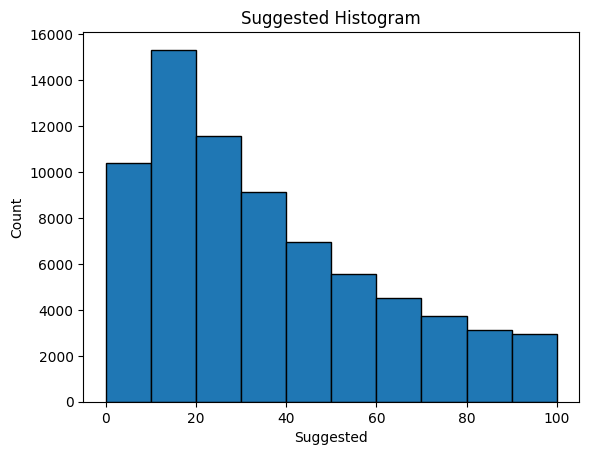

In [71]:
ax=plt.gca()
df[df['suggestions_count'] != 0]['suggestions_count'].plot(kind='hist', edgecolor='black', range=(0,100))
plt.title('Suggested Histogram')
plt.xlabel('Suggested')
plt.ylabel('Count')

In [72]:
platforms_count = platforms_bridge['platforms'].value_counts().reset_index(name = 'platforms_total').head(5)

In [73]:
genres_count = genres_bridge['genres'].value_counts().reset_index(name = 'genres_total').head(5)

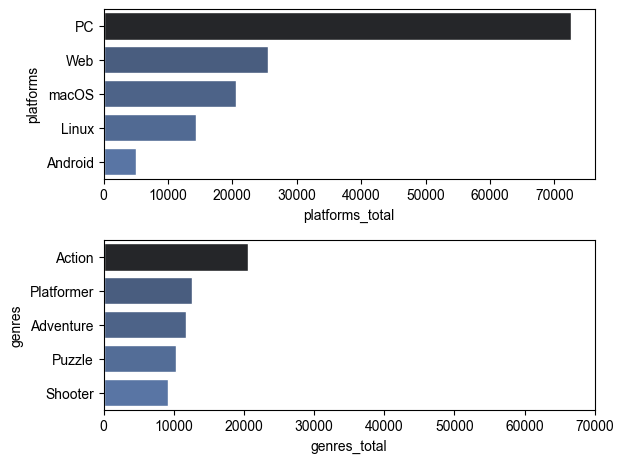

In [74]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=platforms_count, x='platforms_total', y='platforms', ax=ax[0], hue='platforms_total', palette = 'dark:b_r')
ax[0].legend().set_visible(False)

sns.barplot(data=genres_count, x='genres_total', y='genres', ax=ax[1], hue='genres_total', palette = 'dark:b_r')
ax[1].legend().set_visible(False)

ax[1].set_xlim(0,70000)

fig.tight_layout()
plt.show()

In [75]:
developers_count = developers_bridge['developers'].value_counts().reset_index(name = 'developers_total').head(5)
esrb_count = df['esrb_rating'].value_counts().reset_index(name = 'esrb_rating_total').head(5)
publishers_count = publishers_bridge['publishers'].value_counts().reset_index(name = 'publishers_total').head(5)

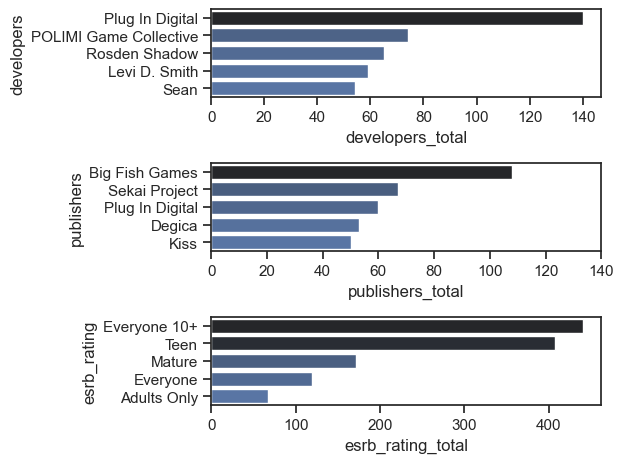

In [76]:
fig, ax = plt.subplots(3,1)

sns.set_theme(style='ticks')

sns.barplot(data=developers_count, x='developers_total', y='developers', ax=ax[0], hue='developers_total', palette = 'dark:b_r')
ax[0].legend().set_visible(False)

sns.barplot(data=esrb_count, x='esrb_rating_total', y='esrb_rating', ax=ax[2], hue='esrb_rating_total', palette = 'dark:b_r')
ax[2].legend().set_visible(False)

sns.barplot(data=publishers_count, x='publishers_total', y='publishers', ax=ax[1], hue='publishers_total', palette = 'dark:b_r')
ax[1].legend().set_visible(False)
ax[1].set_xlim(0,140)

fig.tight_layout()
plt.show()

In [77]:
df['metacritic'].describe()

count    858.000000
mean      70.407925
std       11.060944
min       20.000000
25%       65.000000
50%       72.000000
75%       78.000000
max       95.000000
Name: metacritic, dtype: float64

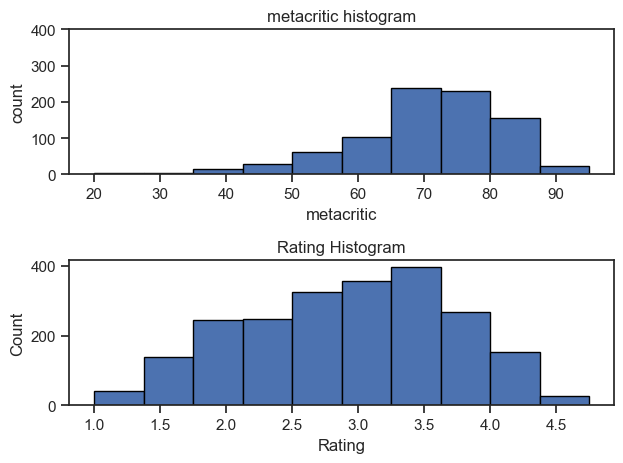

In [78]:
fig, ax = plt.subplots(2,1)

df['metacritic'].plot(kind='hist', edgecolor='black', ax=ax[0])
ax[0].set_title('metacritic histogram')
ax[0].set_xlabel('metacritic')
ax[0].set_ylabel('count')
ax[0].set_ylim(0,400)

df[df['rating'] != 0]['rating'].plot(kind='hist', edgecolor='black', ax=ax[1])
ax[1].set_title('Rating Histogram')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [79]:
genres_merged = genres_bridge.merge(df[['id', 'metacritic', 'rating', 'suggestions_count', 'released']], on='id')
genres_merged

,id,genres,metacritic,rating,suggestions_count,released
0,1,Adventure,NaN,0.0,292,2015-10-23
1,1,Puzzle,NaN,0.0,292,2015-10-23
2,10,Simulation,NaN,0.0,389,2016-01-06
3,10,Indie,NaN,0.0,389,2016-01-06
4,100,Adventure,NaN,0.0,83,2015-09-24
...,...,...,...,...,...,...
97591,194176,Action,NaN,0.0,62,2018-05-15
97592,194176,Simulation,NaN,0.0,62,2018-05-15
97593,194177,Shooter,NaN,0.0,32,2017-09-14
97594,194178,Action,NaN,0.0,33,2018-04-29


In [80]:
top_genres = genres_merged['genres'].value_counts().head().reset_index()['genres'].tolist()
top_genres_merged = genres_merged[genres_merged['genres'].isin(top_genres)]
top_genres_merged['month_start'] = top_genres_merged['released'].dt.to_period('M').dt.start_time

C:\Users\Admin\AppData\Local\Temp\ipykernel_32248\488779314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genres_merged['month_start'] = top_genres_merged['released'].dt.to_period('M').dt.start_time


In [81]:
top_genres_merged

,id,genres,metacritic,rating,suggestions_count,released,month_start
0,1,Adventure,NaN,0.0,292,2015-10-23,2015-10-01
1,1,Puzzle,NaN,0.0,292,2015-10-23,2015-10-01
4,100,Adventure,NaN,0.0,83,2015-09-24,2015-09-01
6,1000,Action,NaN,0.0,455,2016-10-20,2016-10-01
11,100001,Adventure,NaN,0.0,116,2014-05-03,2014-05-01
...,...,...,...,...,...,...,...
97590,194175,Puzzle,NaN,0.0,134,2017-08-27,2017-08-01
97591,194176,Action,NaN,0.0,62,2018-05-15,2018-05-01
97593,194177,Shooter,NaN,0.0,32,2017-09-14,2017-09-01
97594,194178,Action,NaN,0.0,33,2018-04-29,2018-04-01


In [82]:
top_genres_pivot = top_genres_merged[(top_genres_merged['released']>pd.Timestamp('2013-01-01'))&(top_genres_merged['released']<pd.Timestamp('2019-01-01'))].pivot_table(index='month_start', columns='genres', aggfunc='size', fill_value=0)
top_genres_pivot

genres,Action,Adventure,Platformer,Puzzle,Shooter
month_start,,,,,
2013-02-01,13,11,1,1,0
2013-03-01,10,8,3,2,2
2013-04-01,10,8,4,2,1
2013-05-01,9,7,3,1,3
2013-06-01,12,5,0,1,2
...,...,...,...,...,...
2018-08-01,999,451,602,620,394
2018-09-01,3,4,0,1,0
2018-10-01,1,2,0,0,0


<Axes: xlabel='month_start'>

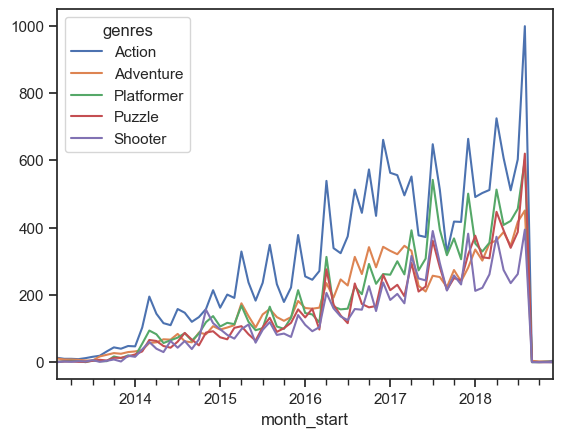

In [83]:
top_genres_pivot.plot(kind='line')

In [84]:
genres_stats = genres_merged.groupby('genres').agg(
    size=('id', 'count'),
    avg_metacritic = ('metacritic', lambda x: x.dropna().mean()),
    avg_rating = ('rating', lambda x: x[x!=0].mean()),
    avg_suggested = ('suggestions_count', lambda x: x[x!=0].mean())
).sort_values(by='size', ascending=False).reset_index()
genres_stats

,genres,size,avg_metacritic,avg_rating,avg_suggested
0,Action,20633,69.776498,2.841543,110.697373
1,Platformer,12617,77.281250,3.289245,56.442615
2,Adventure,11746,68.847938,2.914772,144.361414
3,Puzzle,10298,74.420290,3.190207,58.793641
4,Shooter,9128,68.342105,3.193091,70.258541
5,Simulation,6956,69.125828,2.941457,114.875496
6,Indie,5960,70.047945,2.845003,287.155395
7,Strategy,5651,72.298755,2.935173,141.848627
8,RPG,5420,71.990338,2.900508,158.751320
9,Casual,2874,69.903226,2.621607,259.342847


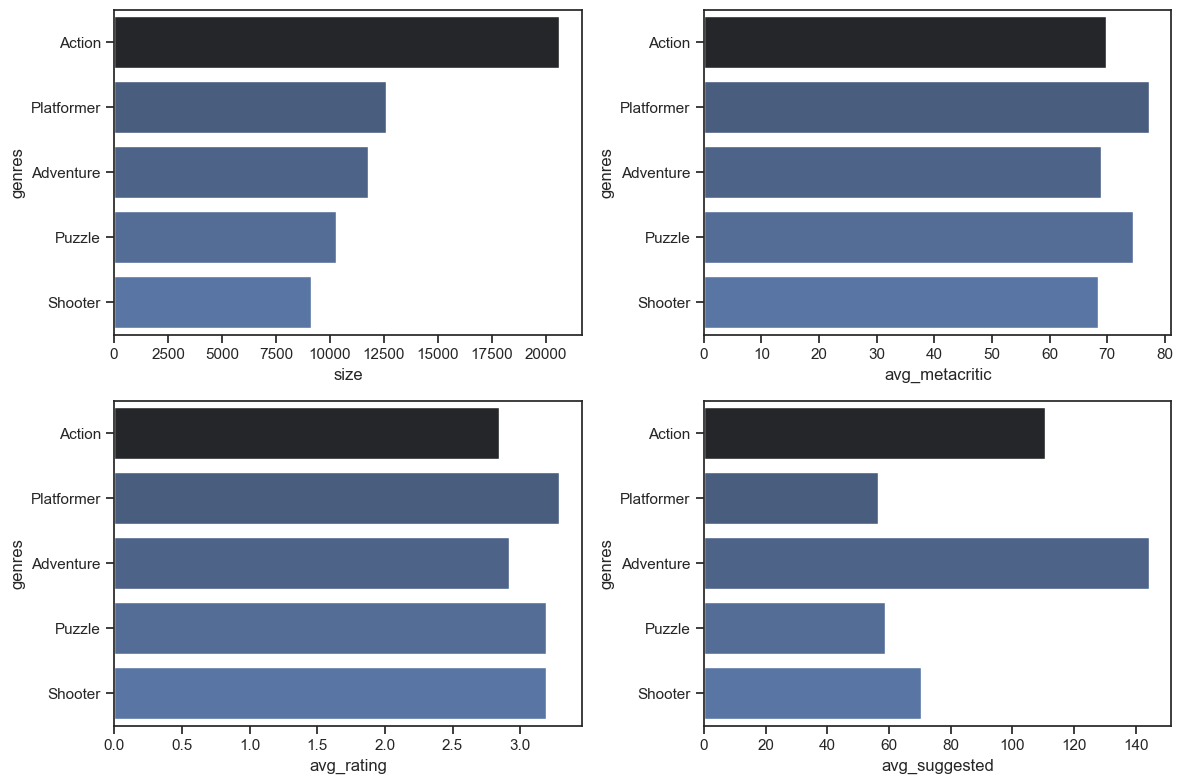

In [85]:
fig, ax = plt.subplots(2,2, figsize = (12,8))

sns.barplot(data = genres_stats.head(5), x = 'size', y = 'genres', ax = ax[0, 0], hue = 'size', palette = 'dark:b_r')
ax[0, 0].legend().set_visible(False)

sns.barplot(data = genres_stats.head(5), x = 'avg_metacritic', y = 'genres', ax = ax[0, 1], hue = 'size', palette = 'dark:b_r')
ax[0, 1].legend().set_visible(False)

sns.barplot(data = genres_stats.head(5), x = 'avg_rating', y = 'genres', ax = ax[1, 0], hue = 'size', palette = 'dark:b_r')
ax[1, 0].legend().set_visible(False)

sns.barplot(data = genres_stats.head(5), x = 'avg_suggested', y = 'genres', ax = ax[1, 1], hue = 'size', palette = 'dark:b_r')
ax[1, 1].legend().set_visible(False)

plt.tight_layout()
plt.show()

In [86]:
genres_count = genres_bridge.groupby('id').genres.count().reset_index(name='genres_count')
genres_count

,id,genres_count
0,1,2
1,10,2
2,11,2
3,12,3
4,14,5
...,...,...
75071,194175,1
75072,194176,2
75073,194177,1
75074,194178,1


In [87]:
genres_count_merged = genres_count.merge(df[['id', 'metacritic', 'rating']], on='id')
genres_count_merged = genres_count_merged.reset_index()
genres_count_merged

,index,id,genres_count,metacritic,rating
0,0,1,2,NaN,0.0
1,1,10,2,NaN,0.0
2,2,11,2,NaN,0.0
3,3,12,3,75.0,3.5
4,4,14,5,72.0,3.7
...,...,...,...,...,...
75071,75071,194175,1,NaN,0.0
75072,75072,194176,2,NaN,0.0
75073,75073,194177,1,NaN,0.0
75074,75074,194178,1,NaN,0.0


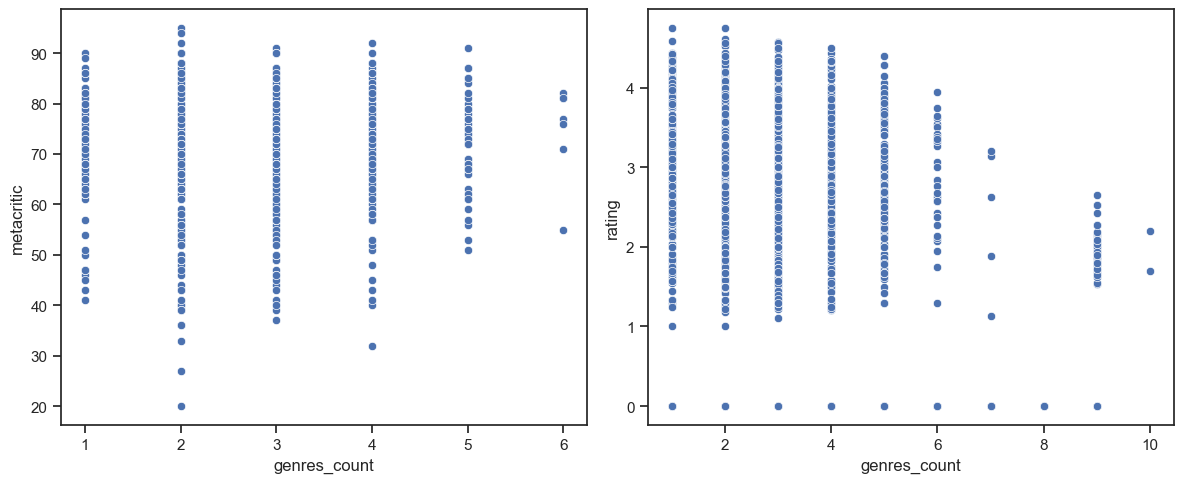

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.scatterplot(data=genres_count_merged, x='genres_count', y='metacritic', ax=ax[0])

sns.scatterplot(data=genres_count_merged, x='genres_count', y='rating', ax = ax[1])

plt.tight_layout()
plt.show()

In [89]:
genres_count_stats = genres_count_merged.groupby('genres_count').agg(
    size = ('id', 'count'),
    avg_metacritic = ('metacritic', lambda x: x.dropna().mean()),
    avg_rating = ('rating', lambda x: x[x!=0].mean())
).reset_index()

genres_count_stats

,genres_count,size,avg_metacritic,avg_rating
0,1,60820,71.927835,3.101492
1,2,8964,69.835766,2.976631
2,3,3311,69.839721,2.856729
3,4,1350,70.817568,2.968856
4,5,432,72.222222,2.810451
5,6,131,74.714286,2.854848
6,7,21,NaN,2.398000
7,8,3,NaN,NaN
8,9,42,NaN,1.961081
9,10,2,NaN,1.950000


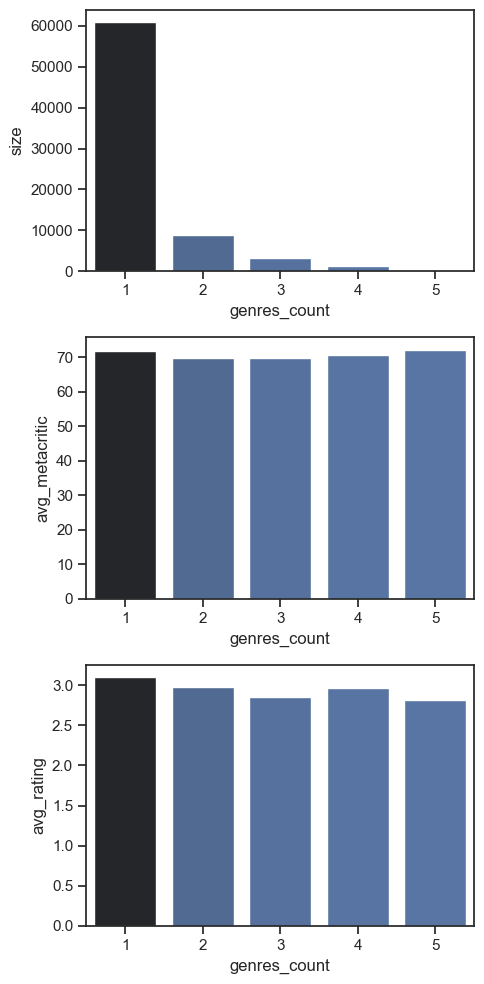

In [90]:
fig, ax = plt.subplots(3,1, figsize = (5,10))

sns.barplot(data = genres_count_stats.head(5), y = 'size', x = 'genres_count', ax = ax[0], hue = 'size', palette = 'dark:b_r')
ax[0].legend().set_visible(False)

sns.barplot(data = genres_count_stats.head(5), y = 'avg_metacritic', x = 'genres_count', ax = ax[1], hue = 'size', palette = 'dark:b_r')
ax[1].legend().set_visible(False)

sns.barplot(data = genres_count_stats.head(5), y = 'avg_rating', x = 'genres_count', ax = ax[2], hue = 'size', palette = 'dark:b_r')
ax[2].legend().set_visible(False)

plt.tight_layout()
plt.show()

In [91]:
df['released'].describe()

count                            98333
mean     2017-01-17 10:08:06.697242880
min                2013-02-01 00:00:00
25%                2016-04-17 00:00:00
50%                2017-04-04 00:00:00
75%                2018-01-18 00:00:00
max                2018-12-22 00:00:00
Name: released, dtype: object

In [92]:
platforms_merged = platforms_bridge.merge(df[['id', 'released']], on='id').reset_index(drop=True)
platforms_merged

,id,platforms,released
0,1,PC,2015-10-23
1,1,macOS,2015-10-23
2,1,Xbox One,2015-10-23
3,1,PlayStation 4,2015-10-23
4,1,Nintendo Switch,2015-10-23
...,...,...,...
141011,194176,PC,2018-05-15
141012,194176,Linux,2018-05-15
141013,194177,PC,2017-09-14
141014,194178,PC,2018-04-29


In [93]:
top_platforms = platforms_bridge['platforms'].value_counts().head().reset_index()['platforms'].tolist()
top_platforms

['PC', 'Web', 'macOS', 'Linux', 'Android']

In [94]:
top_platforms_merged = platforms_merged[platforms_merged['platforms'].isin(top_platforms)]
top_platforms_merged

,id,platforms,released
0,1,PC,2015-10-23
1,1,macOS,2015-10-23
5,10,macOS,2016-01-06
6,10,PC,2016-01-06
9,1000,PC,2016-10-20
...,...,...,...
141011,194176,PC,2018-05-15
141012,194176,Linux,2018-05-15
141013,194177,PC,2017-09-14
141014,194178,PC,2018-04-29


In [95]:
top_platforms_merged['released_month_year'] = top_platforms_merged['released'].dt.strftime('%B-%Y')

C:\Users\Admin\AppData\Local\Temp\ipykernel_32248\3950101586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_platforms_merged['released_month_year'] = top_platforms_merged['released'].dt.strftime('%B-%Y')


In [96]:
top_platforms_merged

,id,platforms,released,released_month_year
0,1,PC,2015-10-23,October-2015
1,1,macOS,2015-10-23,October-2015
5,10,macOS,2016-01-06,January-2016
6,10,PC,2016-01-06,January-2016
9,1000,PC,2016-10-20,October-2016
...,...,...,...,...
141011,194176,PC,2018-05-15,May-2018
141012,194176,Linux,2018-05-15,May-2018
141013,194177,PC,2017-09-14,September-2017
141014,194178,PC,2018-04-29,April-2018


In [97]:
top_platforms_merged['released_month_year'] = pd.to_datetime(top_platforms_merged['released_month_year'], format='%B-%Y')

C:\Users\Admin\AppData\Local\Temp\ipykernel_32248\2981085552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_platforms_merged['released_month_year'] = pd.to_datetime(top_platforms_merged['released_month_year'], format='%B-%Y')


In [98]:
top_platforms_merged_after_2013 = top_platforms_merged[(top_platforms_merged['released_month_year']> pd.Timestamp('2013-01-01'))&(top_platforms_merged['released_month_year']< pd.Timestamp('2019-01-01'))]
top_platforms_merged_after_2013

,id,platforms,released,released_month_year
0,1,PC,2015-10-23,2015-10-01
1,1,macOS,2015-10-23,2015-10-01
5,10,macOS,2016-01-06,2016-01-01
6,10,PC,2016-01-06,2016-01-01
9,1000,PC,2016-10-20,2016-10-01
...,...,...,...,...
141011,194176,PC,2018-05-15,2018-05-01
141012,194176,Linux,2018-05-15,2018-05-01
141013,194177,PC,2017-09-14,2017-09-01
141014,194178,PC,2018-04-29,2018-04-01


In [99]:
platforms_pivot = top_platforms_merged_after_2013.pivot_table(index='released_month_year', columns = 'platforms', aggfunc='size', fill_value=0)

<Axes: xlabel='released_month_year'>

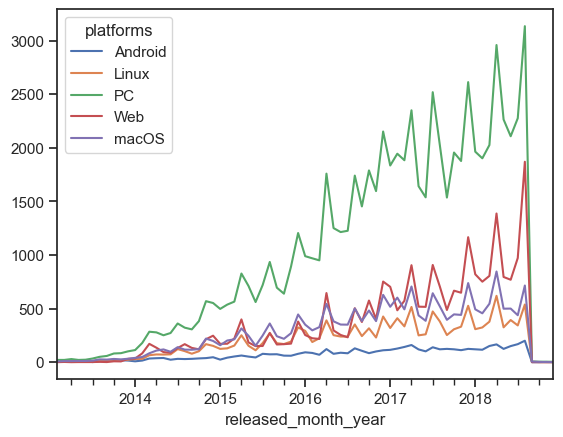

In [100]:
platforms_pivot.plot(kind='line')

In [101]:
df['released'].describe()

count                            98333
mean     2017-01-17 10:08:06.697242880
min                2013-02-01 00:00:00
25%                2016-04-17 00:00:00
50%                2017-04-04 00:00:00
75%                2018-01-18 00:00:00
max                2018-12-22 00:00:00
Name: released, dtype: object

In [102]:
df.head()

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating
0,1,D/Generation HD,NaN,2015-10-23,false,2019-09-17 11:58:57,0.0,80,2,292,"[PC, macOS, Xbox One, PlayStation 4, Nintendo ...",[West Coast Software],"[Adventure, Puzzle]",[West Coast Software],Everyone 10+
1,10,G Prime Into The Rain,NaN,2016-01-06,false,2019-11-06 23:04:19,0.0,26,3,389,"[macOS, PC, Xbox One]",[Soma Games],"[Simulation, Indie]","[Immanitas Entertainment, Code-Monkeys]",Everyone
2,100,Land Sliders,NaN,2015-09-24,false,2019-10-22 13:56:16,0.0,0,2,83,[iOS],[Prettygreat Pty],"[Adventure, Arcade]",[Prettygreat Pty],Everyone 10+
3,1000,Pixel Gear,NaN,2016-10-20,false,2019-08-28 22:16:02,0.0,0,0,455,"[PC, PlayStation 4]","[Oasis Games, Geronimo Interactive]","[Action, Indie]",[Geronimo Interactive],Teen
4,10000,Gods and Idols,NaN,2016-12-12,false,2019-09-17 13:37:13,0.0,0,5,262,[PC],[Viking Tao],"[RPG, Strategy, Massively Multiplayer]",[Viking Tao],NaN


In [103]:
df['released_month_year'] = df['released'].dt.to_period('M').dt.start_time

In [104]:
esrb_pivot = df[(df['released_month_year']> pd.Timestamp('2013-01-01'))&(df['released_month_year']< pd.Timestamp('2019-01-01'))].pivot_table(index='released_month_year', columns='esrb_rating', aggfunc='size', fill_value=0)

<Axes: xlabel='released_month_year'>

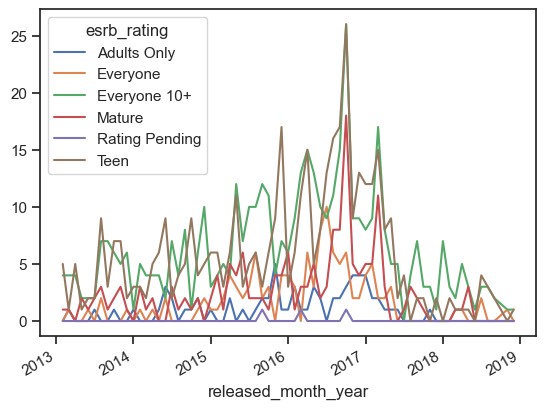

In [105]:
esrb_pivot.plot(kind='line')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98333 entries, 0 to 100564
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   98333 non-null  int32         
 1   name                 98331 non-null  object        
 2   metacritic           858 non-null    float64       
 3   released             98333 non-null  datetime64[ns]
 4   tba                  98333 non-null  object        
 5   updated              98333 non-null  datetime64[ns]
 6   rating               98333 non-null  float64       
 7   achievements_count   98333 non-null  int32         
 8   ratings_count        98333 non-null  int32         
 9   suggestions_count    98333 non-null  int32         
 10  platforms            98333 non-null  object        
 11  developers           98333 non-null  object        
 12  genres               98333 non-null  object        
 13  publishers           98333 non-null

In [107]:
platforms_bridge

,id,platforms
0,1,PC
0,1,macOS
0,1,Xbox One
0,1,PlayStation 4
0,1,Nintendo Switch
...,...,...
100561,194176,PC
100561,194176,Linux
100562,194177,PC
100563,194178,PC


In [108]:
df.head()

,id,name,metacritic,released,tba,updated,rating,achievements_count,ratings_count,suggestions_count,platforms,developers,genres,publishers,esrb_rating,released_month_year
0,1,D/Generation HD,NaN,2015-10-23,false,2019-09-17 11:58:57,0.0,80,2,292,"[PC, macOS, Xbox One, PlayStation 4, Nintendo ...",[West Coast Software],"[Adventure, Puzzle]",[West Coast Software],Everyone 10+,2015-10-01
1,10,G Prime Into The Rain,NaN,2016-01-06,false,2019-11-06 23:04:19,0.0,26,3,389,"[macOS, PC, Xbox One]",[Soma Games],"[Simulation, Indie]","[Immanitas Entertainment, Code-Monkeys]",Everyone,2016-01-01
2,100,Land Sliders,NaN,2015-09-24,false,2019-10-22 13:56:16,0.0,0,2,83,[iOS],[Prettygreat Pty],"[Adventure, Arcade]",[Prettygreat Pty],Everyone 10+,2015-09-01
3,1000,Pixel Gear,NaN,2016-10-20,false,2019-08-28 22:16:02,0.0,0,0,455,"[PC, PlayStation 4]","[Oasis Games, Geronimo Interactive]","[Action, Indie]",[Geronimo Interactive],Teen,2016-10-01
4,10000,Gods and Idols,NaN,2016-12-12,false,2019-09-17 13:37:13,0.0,0,5,262,[PC],[Viking Tao],"[RPG, Strategy, Massively Multiplayer]",[Viking Tao],NaN,2016-12-01


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98333 entries, 0 to 100564
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   98333 non-null  int32         
 1   name                 98331 non-null  object        
 2   metacritic           858 non-null    float64       
 3   released             98333 non-null  datetime64[ns]
 4   tba                  98333 non-null  object        
 5   updated              98333 non-null  datetime64[ns]
 6   rating               98333 non-null  float64       
 7   achievements_count   98333 non-null  int32         
 8   ratings_count        98333 non-null  int32         
 9   suggestions_count    98333 non-null  int32         
 10  platforms            98333 non-null  object        
 11  developers           98333 non-null  object        
 12  genres               98333 non-null  object        
 13  publishers           98333 non-null

In [117]:
platforms_rating = df[['id', 'platforms', 'metacritic', 'rating', 'suggestions_count', 'ratings_count']].explode('platforms')
platforms_rating

,id,platforms,metacritic,rating,suggestions_count,ratings_count
0,1,PC,NaN,0.0,292,2
0,1,macOS,NaN,0.0,292,2
0,1,Xbox One,NaN,0.0,292,2
0,1,PlayStation 4,NaN,0.0,292,2
0,1,Nintendo Switch,NaN,0.0,292,2
...,...,...,...,...,...,...
100561,194176,PC,NaN,0.0,62,0
100561,194176,Linux,NaN,0.0,62,0
100562,194177,PC,NaN,0.0,32,0
100563,194178,PC,NaN,0.0,33,0


In [111]:
top_platforms

['PC', 'Web', 'macOS', 'Linux', 'Android']

In [118]:
platforms_rating_stats = platforms_rating[platforms_rating['platforms'].isin(top_platforms)].groupby('platforms').agg(
    size=('id', 'count'),
    avg_metacritic = ('metacritic', lambda x: x.dropna().mean()),
    avg_rating = ('rating', lambda x: x[x!=0].mean()),
    avg_suggested = ('suggestions_count', lambda x: x[x!=0].mean()),
    avg_rated = ('ratings_count', lambda x: x[x!=0].mean())
).reset_index()
platforms_rating_stats

,platforms,size,avg_metacritic,avg_rating,avg_suggested,avg_rated
0,Android,5008,73.847222,3.343333,87.583807,42.633028
1,Linux,14419,71.647222,3.039626,97.181997,34.461899
2,PC,72639,70.395785,2.910311,90.047118,23.818865
3,Web,25454,84.000000,3.398571,36.341331,6.816176
4,macOS,20485,71.325397,3.052899,97.934129,32.724528


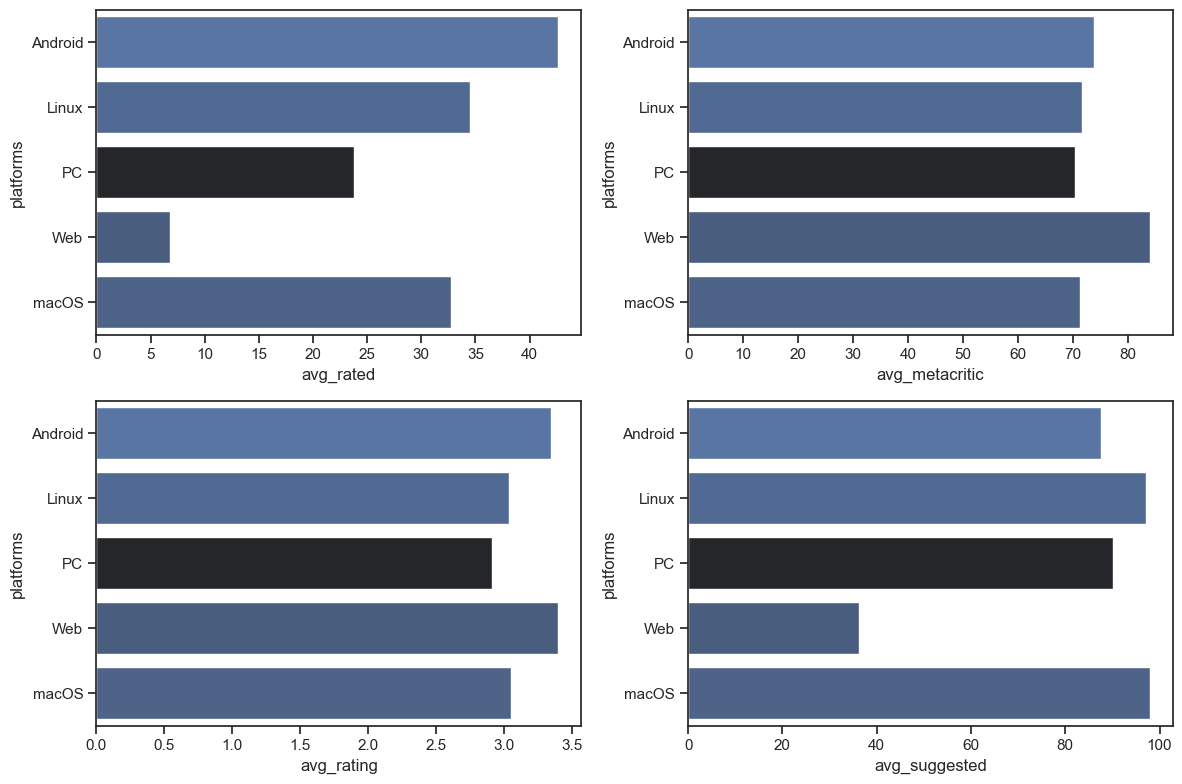

In [119]:
fig,ax = plt.subplots(2,2, figsize =(12,8))

sns.barplot(data = platforms_rating_stats, x = 'avg_rated', y = 'platforms', ax = ax[0, 0], hue = 'size', palette = 'dark:b_r')
ax[0, 0].legend().set_visible(False)

sns.barplot(data = platforms_rating_stats, x = 'avg_metacritic', y = 'platforms', ax = ax[0, 1], hue = 'size', palette = 'dark:b_r')
ax[0, 1].legend().set_visible(False)

sns.barplot(data = platforms_rating_stats, x = 'avg_rating', y = 'platforms', ax = ax[1, 0], hue = 'size', palette = 'dark:b_r')
ax[1, 0].legend().set_visible(False)

sns.barplot(data = platforms_rating_stats, x = 'avg_suggested', y = 'platforms', ax = ax[1, 1], hue = 'size', palette = 'dark:b_r')
ax[1, 1].legend().set_visible(False)

plt.tight_layout()
plt.show()